# 📌 **Student Information**
# 👤 Name: Hashir Ahmed
# 🆔 ID: 26454939
# Course: Data Mining and Visualizationsis

In [2]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

# Loading Data into dataframe.
df = pd.read_csv('diabetes.csv')
df

,Number of times pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# checkinf dimensions of datasert
df.shape

(768, 9)

In [5]:
# checking dataset type
df.dtypes

Number of times pregnant        int64
Glucose                         int64
BloodPressure                   int64
SkinThickness                   int64
Insulin                         int64
BMI                           float64
Diabetes pedigree function    float64
Age                             int64
Class                           int64
dtype: object

# **Task 1: Data Exploration and Identification of Anomalies**

---
l;">1.1 Examine Attribute Distributpan>
- Perform descriptive statistics using **`.describe()`** and visualize the distributions of the following attributes:
  - Plasma Glucose Concentration  
  - Diastolic Blood Pressure  
  - Triceps Skinfold Thickness  
  - 2-Hour Serum Insulin  
  - Body Mass Index  
- **Objective:** Identify potential issues in the dataset, such as:
  - Incorrect values  
  - Missing values  
  - Extreme outliers  
  - Unexpected distributiont-family:Arial;">1.2 Identify Missing aalous Values</span>
- **Investigate Missing Values:**  
  - Check for impossible zeros in attributes where they should not occur.  
- **Methodology:**  
  - Implement a programmatic approach to detect missing values abrown; font-family:Arial;">1.3 Suggest and Implement a Strar Handling Anomalies</span>
- Propose and implement appropriate solutions to manage anomalies:  
  - Replace zeros with imputed or calculated values.  
  - Remove extreme outliers.  
  - Transform data if necessary.  
- **Justification:** Provide reasoning for your chosen method andyle="color:gray;">End of Task</span>
te for this da



In [10]:
# for further we are selection our target cols for this dataset analysis.
target_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
# Descriptive statistics
print(df[target_columns].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


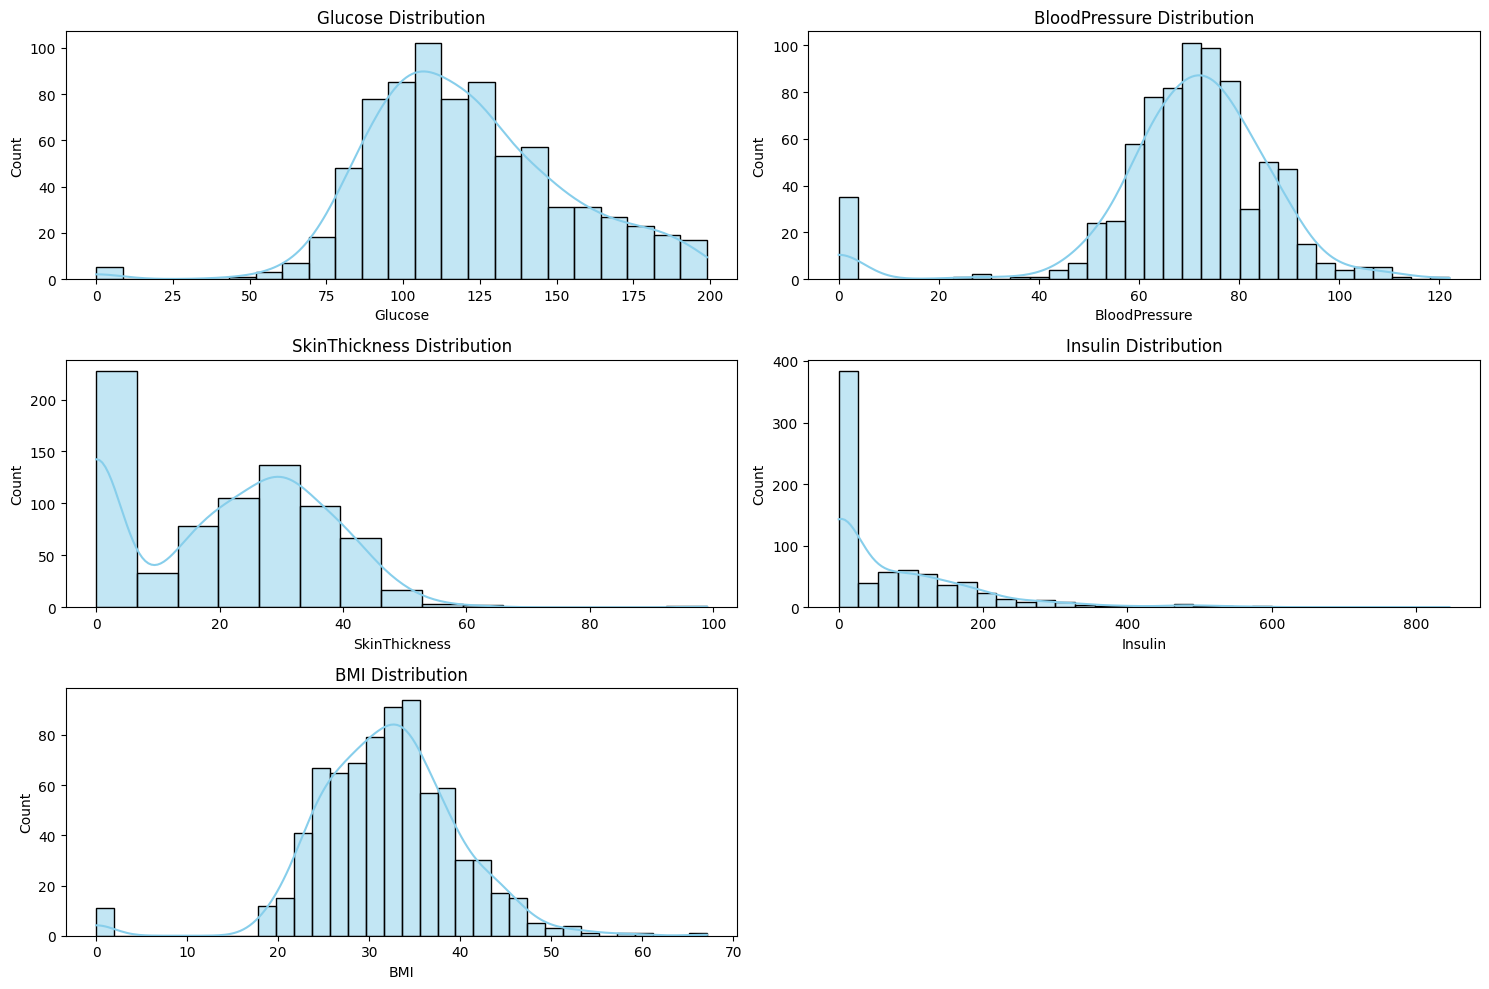

In [13]:
# Distribution visualization
plt.figure(figsize=(15,10))
for i, col in enumerate(target_col, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

## 1.2 Missing/Anomalous Values Identification

In [14]:
# in medical 0 measurements are impossibe so we will check if there is any 0 measuremrnt or not
zero_counts = (df[target_col] == 0).sum()
zero_counts

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<Figure size 1200x800 with 0 Axes>

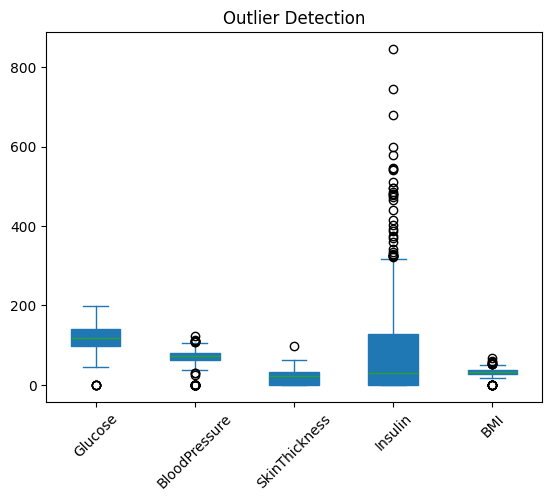

In [15]:
# Printing Boxplot for outlier detection
plt.figure(figsize=(12,8))
df[target_columns].plot(kind='box', patch_artist=True)
plt.title('Outlier Detection')
plt.xticks(rotation=45)
plt.show()

## Anomaly Handling Strategy

In [16]:
# we will replace zeros with nan for out target cols
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col_with_zero] = df[col_with_zero].replace(0, np.nan)

## Task 2: Regression Imputation Feasibility

### Key Problem
Regression imputation faces challenges when predictors also contain missing data:

1. Most regression algorithms need complete cases for training.
2. Missing values in predictors result in listwise deletion.
3. This creates a circular dependency between missing variables.

### Solution
**Use MICE (Multiple Imputation by Chained Equations).**
Equations)

In [18]:
#  importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Creatng MICE impueter
imputer = IterativeImputer(
    estimator=LinearRegression(),
    max_iter=10,
    random_state=42
)

# Apply imputatiom
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


## Task 3: Regression Imputation Implementation

### 3.1 Regression Prediction for Imputation
Use regression models to predict and impute missing values. Steps include:
1. Select predictors with minimal or no missing data.
2. Train a regression model using complete cases.
3. Predict missing values for the target variable based on the model.

---

### Note
Ensure that the imputed values are reviewed for plausibility and consistency with the dataset's distribution.


In [19]:
# Separate complete and missing cases
missing_mask = df['Insulin'].isnull()
complete_data = df_imputed[~missing_mask]
missing_data = df_imputed[missing_mask]

# Train regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(complete_data.drop('Insulin', axis=1), complete_data['Insulin'])

# Predict missing values
predicted_insulin = model.predict(missing_data.drop('Insulin', axis=1))


### 3.2 Comparison: Random vs Regression Imputation

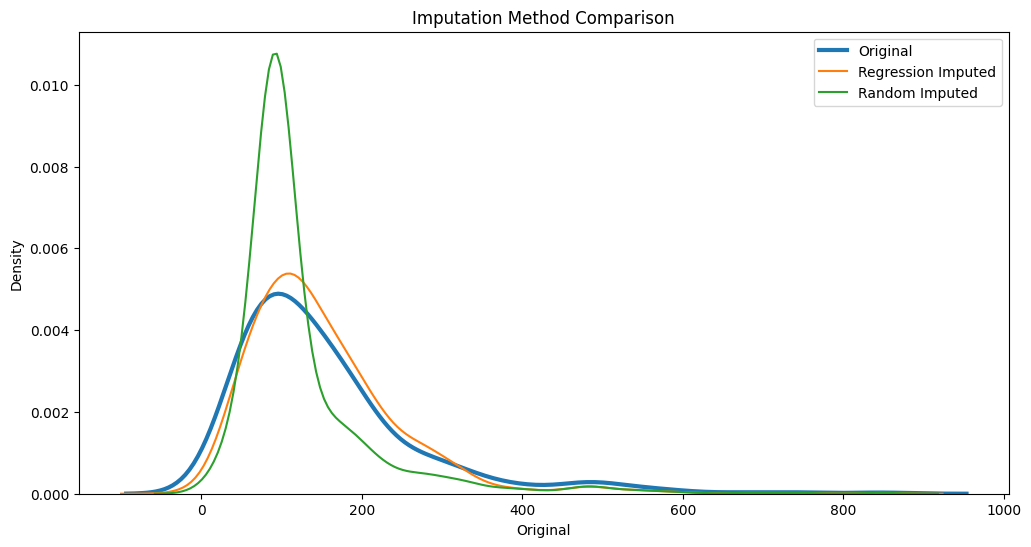

In [20]:
# Random imputation baseline
random_imputed = df['Insulin'].fillna(np.random.choice(df['Insulin'].dropna()))

# Create comparison dataframe
comparison = pd.DataFrame({
    'Original': df['Insulin'],
    'Regression Imputed': df_imputed['Insulin'],
    'Random Imputed': random_imputed
})

# Visual comparison
plt.figure(figsize=(12,6))
sns.kdeplot(comparison['Original'], label='Original', linewidth=3)
sns.kdeplot(comparison['Regression Imputed'], label='Regression Imputed')
sns.kdeplot(comparison['Random Imputed'], label='Random Imputed')
plt.title('Imputation Method Comparison')
plt.legend()
plt.show()


### 3.3 Distribution Impact Analysis

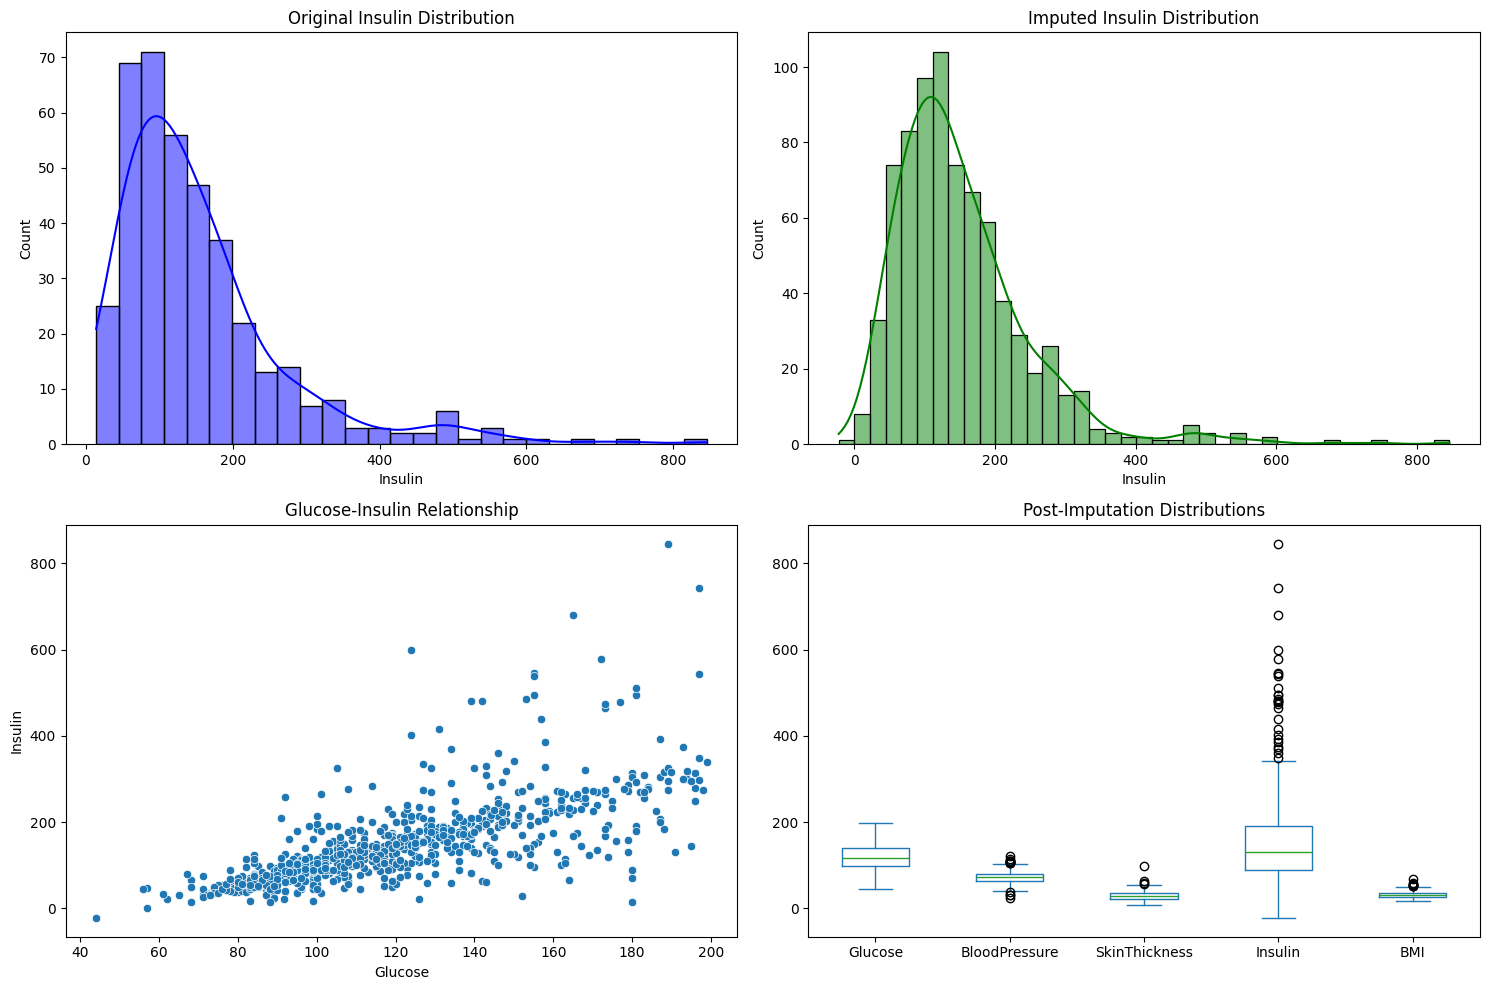

In [21]:
# Before-after comparison
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Original distribution
sns.histplot(df['Insulin'].dropna(), kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title('Original Insulin Distribution')

# Imputed distribution
sns.histplot(df_imputed['Insulin'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title('Imputed Insulin Distribution')

# Correlation check
sns.scatterplot(x='Glucose', y='Insulin', data=df_imputed, ax=axes[1,0])
axes[1,0].set_title('Glucose-Insulin Relationship')

# Boxplot comparison
df_imputed[target_columns].plot(kind='box', ax=axes[1,1])
plt.title('Post-Imputation Distributions')

plt.tight_layout()
plt.show()


In [22]:
# Check distribution preservation
original_skew = df['Insulin'].skew()
imputed_skew = df_imputed['Insulin'].skew()
print(f"Skewness Change: {abs(original_skew - imputed_skew):.2f}")

# Check correlation preservation
original_corr = df[['Glucose', 'Insulin']].corr().iloc[0,1]
imputed_corr = df_imputed[['Glucose', 'Insulin']].corr().iloc[0,1]
print(f"Correlation Change: {abs(original_corr - imputed_corr):.4f}")


Skewness Change: 0.06
Correlation Change: 0.1192


## Recommendations

1. **Use MICE**  
   - Opt for Multiple Imputation by Chained Equations (MICE) instead of single regression for handling multivariate missingness.

2. **Check Distribution Preservation**  
   - Always ensure that the imputed values preserve the original data distribution after imputation.

3. **Consider Multiple Methods**  
   - Evaluate and compare various imputation methods during the final analysis phase to determine the best fit.

4. **Validate Results**  
   - Use correlation matrices and distribution metrics to validate the accuracy and consistency of the imputed data.

---

### This Approach Ensures:
- **Biological Plausibility**  
  - Prevents unrealistic values such as zeros in biologically significant data.  

- **Preservation of Variable Relationships**  
  - Maintains the interdependencies among variables.  

- **Minimal Distortion**  
  - Reduces alterations to the original distributions.  

- **Transparency**  
  - Facilitates clear handling of missing data under the Missing At Random (MAR) assumption.
m (MAR assumption)

In [23]:
# --End--